# Replicamos la sección 5 de paper (1988)

In [28]:
import main as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

dataset = pd.read_csv("dataset.csv")

y = dataset["ozone"].to_numpy()
X = dataset[["radiation","temperature","wind"]].to_numpy()
plt.rc('axes', labelsize=18, titlesize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)


## Pairplot (Figura 3)

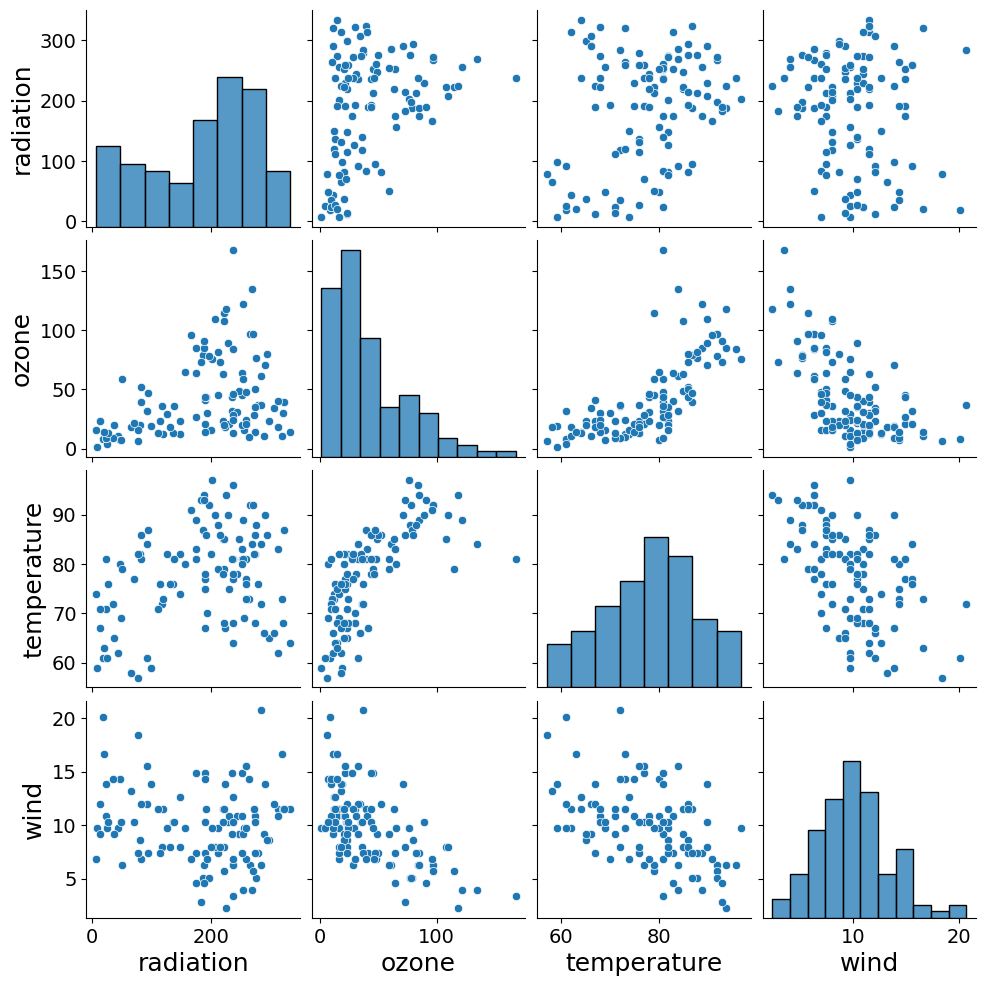

In [29]:
sns.pairplot(dataset[["radiation", "ozone", "temperature", "wind"]])
#plt.savefig('img/fig3.svg')
plt.show()

## QQ-Plot (Figura 4a)

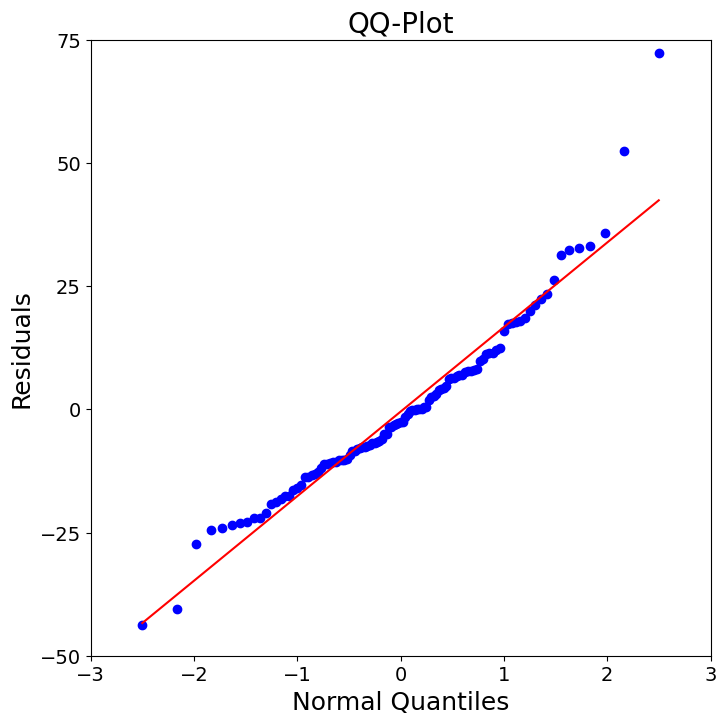

In [30]:
grado = 1
q = 44

y_res = m.fit(X, y, q, grado)

dataset["residuo"] = y - y_res

plt.rcParams["figure.figsize"] = (8, 8)
stats.probplot(dataset["residuo"], dist="norm", plot=plt)
plt.xlim(-3, 3)
plt.ylim(-50, 75)
plt.yticks(np.arange(-50, 100, 25))
plt.ylabel("Residuals")
plt.xlabel("Normal Quantiles")
plt.title("QQ-Plot")
#plt.savefig('img/fig4a.svg')
plt.show()

## Residuals vs Fitted Values (Figura 4b)

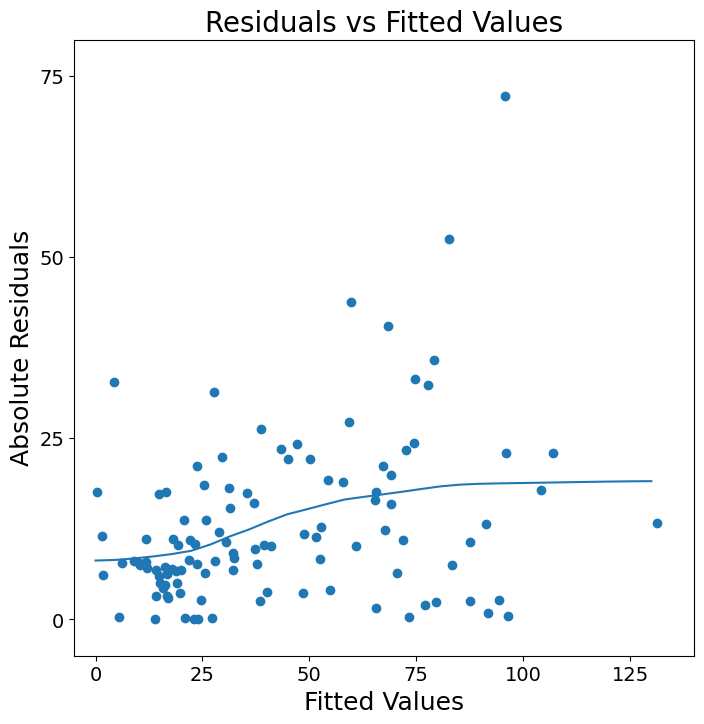

In [31]:
plt.scatter(y_res, np.abs(dataset["residuo"]))
x_lin = np.linspace(0, 130, 30)
x_fit = [m.predict(y_res.reshape(-1, 1), np.abs(dataset["residuo"].to_numpy()
                                              ).reshape(-1, 1), np.array([i]).reshape(1, 1), 74, grado) for i in x_lin]
plt.plot(x_lin, x_fit)
plt.xlim(-5, 140)
plt.ylim(-5, 80)
plt.xticks(np.arange(0, 140, 25))
plt.yticks(np.arange(0, 100, 25))
plt.ylabel("Absolute Residuals")
plt.xlabel("Fitted Values")
plt.title("Residuals vs Fitted Values")
#plt.savefig('img/fig4b.svg')
plt.show()

## Residuals vs Independent variables (Figura 5)

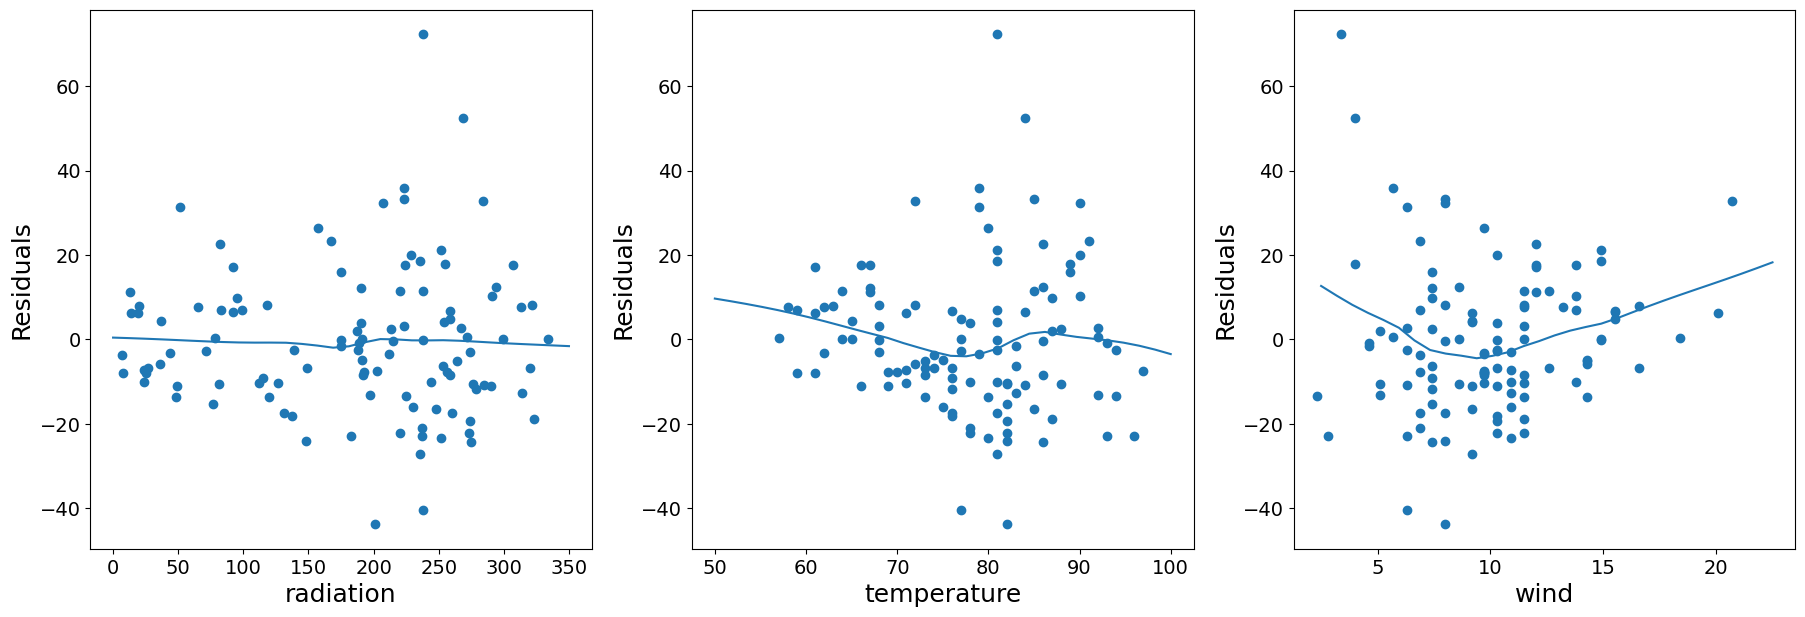

In [32]:
plt.rcParams["figure.figsize"] = (22, 7)
fig, ax = plt.subplots(1, 3)
for idx, vals in enumerate([("radiation", 0, 350), ("temperature", 50, 100), ("wind", 2.5, 22.5)]):
    ax[idx].scatter(dataset[vals[0]], dataset["residuo"])
    x_lin = np.linspace(vals[1], vals[2], 30)
    x_fit = [m.predict(dataset[vals[0]].to_numpy().reshape(-1, 1), dataset["residuo"].to_numpy(
    ).reshape(-1, 1), np.array([i]).reshape(1, 1), 74, grado) for i in x_lin]
    ax[idx].plot(x_lin, x_fit)
    ax[idx].set_xlabel(vals[0])
    ax[idx].set_ylabel("Residuals")
#plt.savefig('img/fig5.svg')
plt.show()

# Three-variable conditioning plots (Figura 6-8)

## Ozone vs Temperature  (Figura 6)

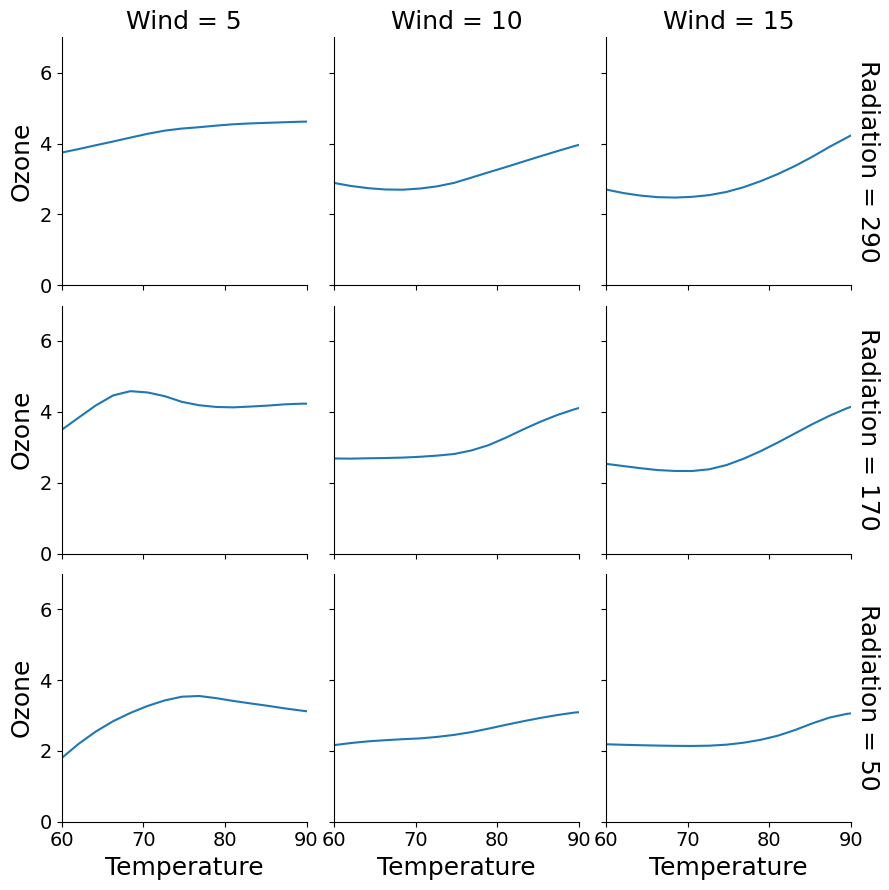

In [33]:
rad_vals = np.array([290, 170, 50])
wind_vals = np.array([5, 10, 15])
temp_lin = np.linspace(60, 100, 20)
cr_ozone = (y**(1/3)).reshape(-1, 1)
X = dataset[["radiation", "temperature", "wind"]].to_numpy()
valores = []
for i in rad_vals:
    for j in wind_vals:
        for k in temp_lin:
            valores += [m.predict(X, cr_ozone, np.array([i, k, j]).reshape(1, 3), 89, 2, standardize=True)[0], i, k, j]

df4 = pd.DataFrame(np.array(valores).reshape(20*9, 4),
                   columns=["Ozone", "Radiation", "Temperature", "Wind"])
df4["Radiation"] = df4["Radiation"].astype(int)
df4["Wind"] = df4["Wind"].astype(int)
cond_plot = sns.FacetGrid(data=df4, row="Radiation",
                          col="Wind", margin_titles=True, row_order=[290, 170, 50])
cond_plot.map(sns.lineplot, "Temperature", "Ozone", )
cond_plot.set(xlim=(60, 90), ylim=(0, 7))
#plt.savefig('img/fig6.svg')
plt.show()

## Ozone vs Wind (Figura 7)

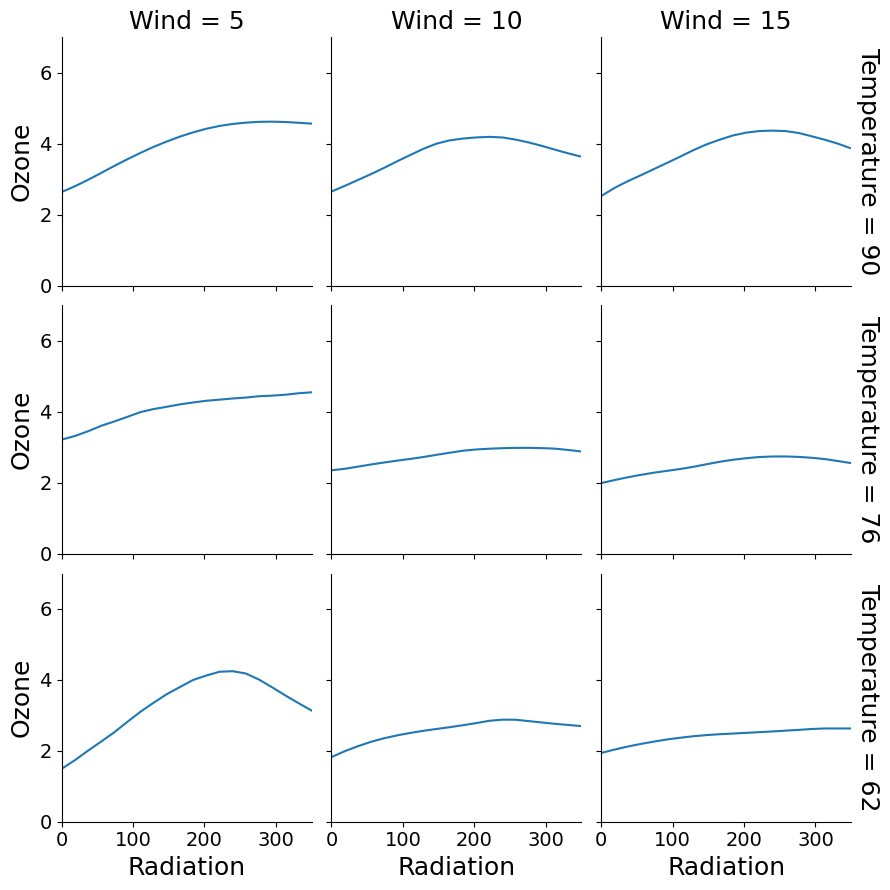

In [34]:
temp_vals = np.array([90, 76, 62])
wind_vals = np.array([5, 10, 15])
rad_lin = np.linspace(0, 350, 20)
cr_ozone = (y**(1/3)).reshape(-1, 1)
X = dataset[["radiation", "temperature", "wind"]].to_numpy()
valores = []
for i in temp_vals:
    for j in wind_vals:
        for k in rad_lin:
            valores += [m.predict(X, cr_ozone, np.array([k, i, j]).reshape(1, 3), 89, 2, standardize=True)[0],  k, i, j]

df4 = pd.DataFrame(np.array(valores).reshape(20*9, 4),
                   columns=["Ozone", "Radiation", "Temperature", "Wind"])
df4["Temperature"] = df4["Temperature"].astype(int)
df4["Wind"] = df4["Wind"].astype(int)
cond_plot = sns.FacetGrid(data=df4, row="Temperature",
                          col="Wind", margin_titles=True, row_order=[90, 76, 62])
cond_plot.map(sns.lineplot, "Radiation", "Ozone")
cond_plot.set(xlim=(0, 350), ylim=(0, 7))
#plt.savefig('img/fig7.svg')
plt.show()

## Ozone vs Radiation (Figura 8)

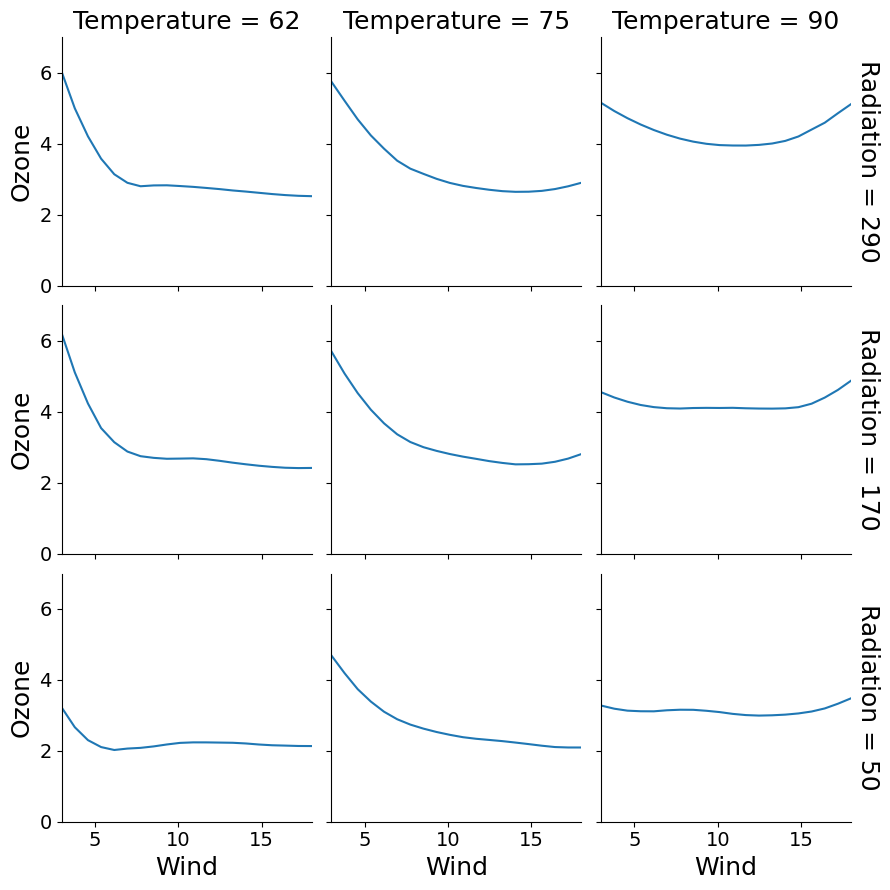

In [35]:
temp_vals = np.array([62, 75, 90])
rad_vals = np.array([290, 170, 50])
wind_lin = np.linspace(3, 18, 20)
cr_ozone = (y**(1/3)).reshape(-1, 1)
X = dataset[["radiation", "temperature", "wind"]].to_numpy()
valores = []
for i in temp_vals:
    for j in rad_vals:
        for k in wind_lin:
            valores += [m.predict(X, cr_ozone, np.array([j, i, k]).reshape(1, 3), 89, 2, standardize=True)[0],  j, i, k]

df4 = pd.DataFrame(np.array(valores).reshape(20*9, 4),
                   columns=["Ozone", "Radiation", "Temperature", "Wind"])
df4["Temperature"] = df4["Temperature"].astype(int)
df4["Radiation"] = df4["Radiation"].astype(int)
cond_plot = sns.FacetGrid(data=df4, row="Radiation",
                          col="Temperature", margin_titles=True, row_order=[290, 170, 50])
cond_plot.map(sns.lineplot, "Wind", "Ozone")
cond_plot.set(xlim=(3, 18), ylim=(0, 7))
#plt.savefig('img/fig8.svg')
plt.show()

### Prueba para conseguir Intervalo de confianza (Errorbar)

[0.5531001639733548, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5112234013165536, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.38615581491305456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.28412911063429624, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3967780097690039, 0, 0, 0, 0, 0, 0, 0, 0, 0]


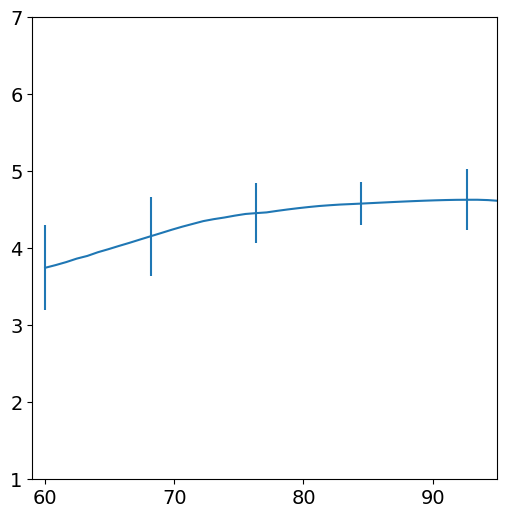

In [36]:
plt.rcParams["figure.figsize"] = (6, 6)
temp_lin = np.linspace(60, 100, 50)
cr_oz_croot = np.array([m.predict(X, cr_ozone, np.array([290, i, 5]).reshape(
    1, 3), 89, 2, standardize=True)[0] for i in temp_lin])
a = cr_oz_croot.reshape(5, 10)
cis = []
for n in a:
    x = np.mean(n)
    std_s = np.std(n)/np.sqrt(len(n))
    #t-student confidence interval
    t = stats.t.ppf(0.975, len(n)-1)
    ci = (x - t*std_s, x + t*std_s)
    cis += [np.abs(ci[0] - ci[1])**(1/3), 0, 0, 0, 0, 0, 0, 0, 0, 0]

print(cis)
plt.errorbar(temp_lin, cr_oz_croot, yerr=cis)
plt.xlim(59, 95)
plt.ylim(1, 7)
plt.show()